In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
nlp.pipeline

print(nlp.pipe_names)

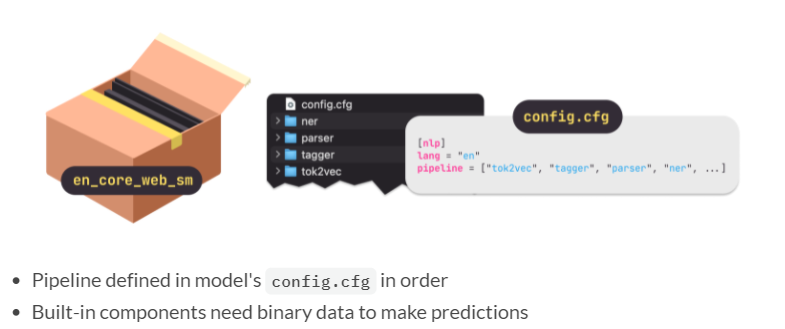

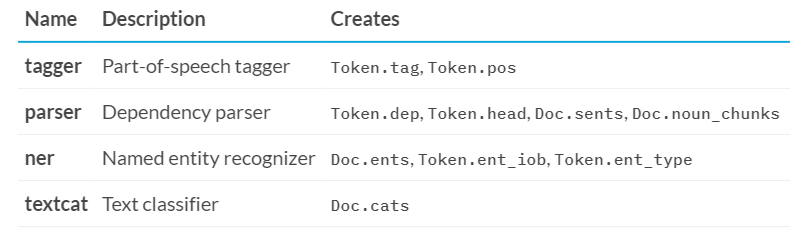

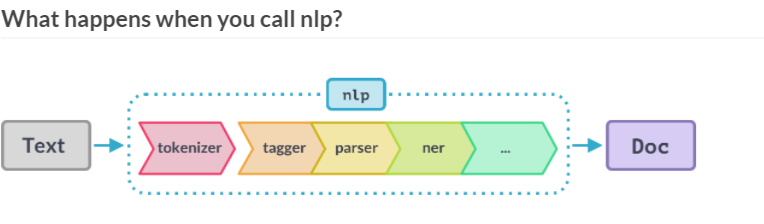

# spaCy contains statistical neural network models trained to perform named entity recognition,
part-of-speech tagging, syntactic dependency parsing, and
semantic similarity prediction 

In [ ]:
!python -m spacy info
!python -m spacy download en
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
doc = nlp(u'I am flying to Frisco')
print([w.text for w in doc])
#A Doc object is a container for a sequence of Token objects. spaCy generates it
#implicitly based on the text you provide it

In [ ]:
print([w.ents for w in doc])

In [ ]:
doc = nlp(u'this product integrates both libraries for downloading and applying patches')
for token in doc:
    print(token.text, token.lemma_)
#The lemmatisation is different from tokenisation

In [ ]:
import spacy
from spacy.symbols import ORTH, LEMMA
nlp = spacy.load('en_core_web_sm')
doc = nlp(u'I am flying to Frisco')
#without correct lemma
print([w.text for w in doc])

#special_case = [{ORTH: u'Frisco', LEMMA: u'San Francisco'}]


nlp.get_pipe("attribute_ruler").add([[{"TEXT": "Frisco"}]], {"LEMMA": "San Francisco"})
#after correcting lemma

nlp.tokenizer.add_special_case(u'Frisco', special_case)
print([w.lemma_ for w in nlp(u'I am flying to Frisco')])

In [ ]:
doc = nlp(u'I am flying to Frisco and after to frisco')    
print(['token:%s lemma:%s' % (t.text, t.lemma_) for t in doc])

In [ ]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

In [ ]:
#oken is VB (a verb in the base, or infinitive, form) ➌ or VBG (a verb in the present progressive form) ➋.
doc = nlp(u'I have flown to LA. Now I am flying to Frisco.')
print([w.text for w in doc if w.tag_== 'VBG' or w.tag_== 'VB'])

In [ ]:
print([w.text for w in doc if w.pos_ == 'PROPN'])

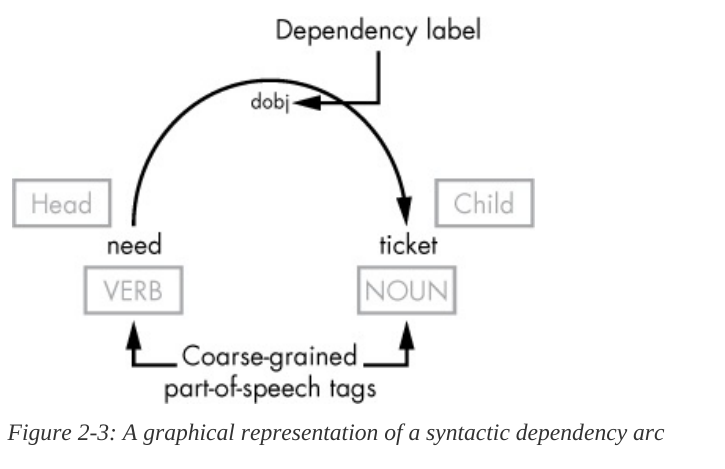

In [ ]:
# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", [pattern])

# Process some text
doc = nlp("Upcoming iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)

In [ ]:
doc = nlp("Upcoming iPhone X release date leaked")
matches = matcher(doc)

# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

In [ ]:
pattern = [
    {"IS_DIGIT": True},
    {"LOWER": "fifa"},
    {"LOWER": "world"},
    {"LOWER": "cup"},
    {"IS_PUNCT": True}
]
matcher.add("FIFA_PATTERN", [pattern])
doc = nlp("2018 FIFA World Cup: France won!")

In [ ]:
pattern = [
    {"LEMMA": "love", "POS": "VERB"},
    {"POS": "NOUN"}
]

In [ ]:
nlp.vocab.strings.add("coffee")
coffee_hash = nlp.vocab.strings["coffee"]
coffee_string = nlp.vocab.strings[coffee_hash] #both use strings only...

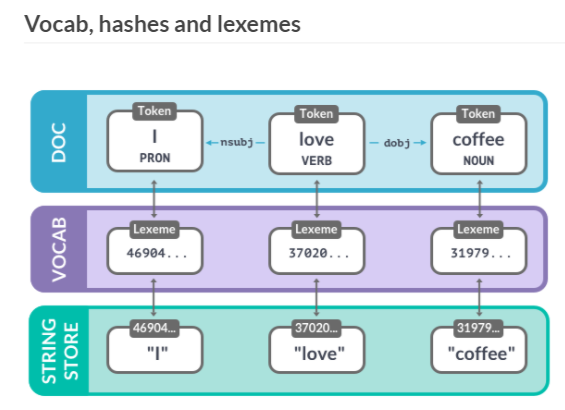

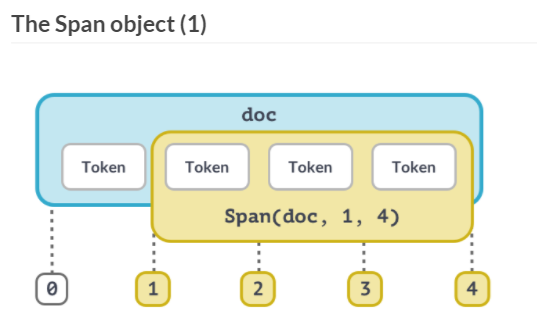

In [ ]:
matcher = Matcher(nlp.vocab)
matcher.add("DOG", [[{"LOWER": "golden"}, {"LOWER": "retriever"}]])
doc = nlp("I have a Golden Retriever")

for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print("Matched span:", span.text)
    # Get the span's root token and root head token
    print("Root token:", span.root.text)
    print("Root head token:", span.root.head.text)
    # Get the previous token and its POS tag
    print("Previous token:", doc[start - 1].text, doc[start - 1].pos_)


In [ ]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

pattern = nlp("Golden Retriever")
matcher.add("DOG", [pattern])
doc = nlp("I have a Golden Retriever")

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Get the matched span
    span = doc[start:end]
    print("Matched span:", span.text)

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Berlin looks like a nice city")

# Iterate over the tokens
for token in doc:
    # Check if the current token is a proper noun
    if token.pos_ == "PROPN":
        # Check if the next token is a verb
        if doc[token.i + 1].pos_ == "VERB":
            print("Found proper noun before a verb:", token.text)

In [ ]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

# Create a span manually
span = Span(doc, 0, 2)

# Create a span with a label
span_with_label = Span(doc, 0, 2, label="GREETING")

# Add span to the doc.ents
doc.ents = [span_with_label]

In [ ]:
doc.ents[0].label_

In [ ]:
doc = nlp("I love coffee")
lexeme = nlp.vocab["coffee"]

# Print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

In [ ]:
coffee_string

In [ ]:
doc = nlp("I loved dogs but now I love cats more.")

Example	Description

{"OP": "!"}	Negation: match 0 times

{"OP": "?"}	Optional: match 0 or 1 times

{"OP": "+"}	Match 1 or more times

{"OP": "*"}	Match 0 or more times

In [ ]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

In [ ]:
for token in doc:
    print(token.head.text, token.dep_, token.text)

In [ ]:
for sent in doc.sents:
    print([w.text for w in sent if w.dep_ == 'ROOT' or w.dep_ == 'pobj'])

In [ ]:
for token in doc:
    if token.ent_type != 0:
        print(token.text, token.ent_type_)

Token, Span, and Doc, the most widely used container
objects in spaCy from a user’s standpoint, represent a token, a
phrase or sentence, and a text, respectively

In [ ]:
#simply iterating over the doc...
[doc[i] for i in range(len(doc))]

In [ ]:
from spacy.tokens.doc import Doc
from spacy.vocab import Vocab
doc = Doc(Vocab(),words=[u'Hi', u'there'])

In [ ]:
#lefts can be rights too, the children
doc = nlp(u'I want a green apple.')
[w for w in doc[4].lefts]
[w for w in doc[4].children]

In [ ]:
doc = nlp(u'A severe storm hit the beach. It started to rain.')
for sent in doc.sents:
    [print(sent[i]) for i in range(len(sent))]

In [ ]:
[doc[i] for i in range(len(doc))]

In [ ]:
doc = nlp(u'A noun chunk is a phrase that has a noun as its head.')
for chunk in doc.noun_chunks:
    print(chunk)

In [ ]:
doc=nlp('I want a green apple.')
doc[2:5] #slicing the doc like an array

In [ ]:
doc = nlp(u'The Golden Gate Bridge is an iconic landmark in San Francisco.')
[doc[i] for i in range(len(doc))]

In [ ]:
span = doc[1:4]
lem_id = doc.vocab.strings[span.text]
span.merge(lemma = lem_id) #this has been depricated.

In [ ]:
with doc.retokenize() as retokenizer: #this method needs to be understood.
    for ent in doc[1:4]:
        retokenizer.merge(ent)

In [ ]:
#checking the pipe-line
nlp.pipeline

In [ ]:
nlp.pipe_factories

In [ ]:
 print(nlp.meta['lang'] + '_hoo_haa_' + nlp.meta['name'])

In [ ]:
from spacy import util
util.get_package_path('en_core_web_sm')

In [ ]:
doc = nlp(u'I need a taxi to Festy.')
for ent in doc.ents:
    print(ent.text, ent.label_)

In [ ]:
LABEL = 'DISTRICT'
TRAIN_DATA = [
    ('We need to deliver it to Festy.', {'entities': [(25, 30, 'DISTRICT')]}),
    ('I like red oranges', {'entities': []})]

In [ ]:
#getting ner pipeline
entr = nlp.get_pipe('ner')

In [ ]:
entr.add_label(LABEL)

In [ ]:
nlp.disable_pipes('tagger')
nlp.disable_pipes('parser')

In [ ]:
optimizer = entr.entity.create_optimizer()
import random
for i in range(25):
    random.shuffle(TRAIN_DATA)
    for text, annotations in TRAIN_DATA:
        nlp.update([text], [annotations], sgd=optimizer)

In [ ]:
entr.create_optimizer()

In [ ]:
doc = nlp(u"The firm earned $1.5 million in 2017.")

In [ ]:
for token in doc:
    print(token.text, token.pos_, spacy.explain(token.pos_))

In [ ]:
for token in doc:
    print(token.text, token.pos_, token.tag_, spacy.explain(token.tag_))

In [ ]:
phrase = ''
alldata = []
for token in doc:
    if token.tag_ == '$':
        phrase = token.text
        i = token.i+1
    
    while doc[i].tag_ == 'CD':
        phrase += doc[i].text + ' '
        i += 1
        break

phrase = phrase[:-1]
print(phrase)

In [ ]:
doc = nlp(u"I can promise it is worth your time.")
sent = ''
for i,token in enumerate(doc):
    if token.tag_ == 'PRP' and doc[i+1].tag_ == 'MD' and doc[i+2].tag_ == 'VB':
        sent = doc[i+1].text.capitalize() + ' ' + doc[i].text
        sent = sent + ' ' + doc[i+2:].text
        break
        
sent

In [ ]:
doc=nlp(sent)
for i,token in enumerate(doc):
    if token.tag_ == 'PRP' and token.text == 'I':
        sent = doc[:i].text + ' you ' + doc[i+1:].text
        break

sent

In [ ]:
doc=nlp(sent)
for i,token in enumerate(doc):
    if token.tag_ == 'PRP$' and token.text == 'your':
        sent = doc[:i].text + ' my ' + doc[i+1:].text
        break
        
sent

In [ ]:
doc=nlp(sent)
for i,token in enumerate(doc):
    if token.tag_ == 'VB':
        sent = doc[:i].text + ' really ' + doc[i:].text
        break
        
sent

In [ ]:
doc=nlp(sent)
sent = doc[:len(doc)-1].text + '?'
#Finally, you should have: 'Can you really promise it is worth my time?'
print(sent)

In [ ]:
for token in doc:
    print(token.text, token.pos_, token.tag_, token.dep_,spacy.explain(token.dep_))

There are two basic types of questions in English: yes/no
questions and information questions. 
Information questions are supposed to be answered with
more information than just yes or no. They begin with a
question word, such as “what,” “where,” “when,” “why,” or
“how.” 

In [ ]:
import sys
def find_chunk(doc):
    chunk = ''
    for i,token in enumerate(doc):
        if token.dep_ == 'dobj':
            sht = len([w for w in token.children])
            #print([w for w in token.children])
            chunk = doc[i-sht:i+1]
            break
    return chunk

In [ ]:
def determine_question_type(chunk):
    question_type = 'yesno'
    for token in chunk:
        if token.dep_ == 'amod':
            question_type = 'info'
        return question_type

In [ ]:
def generate_question(doc, question_type):
    sent = ''
    for i,token in enumerate(doc):
        if token.tag_ == 'PRP' and doc[i+1].tag_ == 'VBP':
            sent = 'do ' + doc[i].text
            sent = sent + ' ' + doc[i+1:].text
            break
    
    doc=nlp(sent)
    
    for i,token in enumerate(doc):
        if token.tag_ == 'PRP' and token.text == 'I':
            sent = doc[:i].text + ' you ' + doc[i+1:].text
            break
    doc=nlp(sent)
    
    if question_type == 'info':
        for i,token in enumerate(doc):
            if token.dep_ == 'dobj':
                sent = 'why ' + doc[:i].text + ' one ' + doc[i+1:].text
                break
                
    if question_type == 'yesno':
        for i,token in enumerate(doc):
            if token.dep_ == 'dobj':
                sent = doc[:i-1].text + ' a red ' + doc[i:].text
                break
    doc=nlp(sent)
    
    sent = doc[0].text.capitalize() +' ' + doc[1:len(doc)-1].text + '?'
    
    return sent

In [ ]:
def quest_cretor(get_sent):
    doc = nlp(get_sent)
    chunk = find_chunk(doc)
    print(chunk)
    if str(chunk) == '':
        print('The sentence does not contain a direct object.')
        question_type = determine_question_type(chunk)
        question = generate_question(doc, question_type)
        print(question)
    else:
        print('You did not submit a sentence!')

In [ ]:
x = 'I want a red computer'
find_chunk(nlp(x))

In [ ]:
doc.similarity(doc[2:5])

In [ ]:
doc2=nlp('There is lot more appline on the other pages.')

In [ ]:
doc2.similarity(doc2[2:3])

In [ ]:
for token in doc2:
    print(token.pos_,token.tag_,token.dep_,token.lemma_)

In [ ]:
#Loading 3rd party word vectors
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

In [ ]:
!python -m spacy init vectors en ./wiki-news-300d-1M.vec.zip ./wiki_model 

In [ ]:
!python -m spacy --help

In [ ]:
nlp = spacy.load('/kaggle/working/wiki_model')

In [ ]:
doc = nlp(u'Hi there!')

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
token = nlp(u'fruits')[0]
doc = nlp(u'I want to buy this beautiful book at the end of the week. Sales of citrus have increased over the last year. How much do you know about this type of tree?')
similarity = {}
for i, sent in enumerate(doc.sents):
    noun_span_list = [sent[j].text for j in range(len(sent)) if sent[j].pos_== 'NOUN']
    noun_span_str = ' '.join(noun_span_list)
    noun_span_doc = nlp(noun_span_str)
    similarity.update({i:token.similarity(noun_span_doc)})
    
print(similarity)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')
#first sample text
doc1 = nlp(u"Google Search, often referred to as simply Google, is the most used search engine nowadays. \
It handles a huge number of searches each day.")
#second sample text
doc2 = nlp(u'Microsoft Windows is a family of proprietary operating systems developed and sold by Microsoft. \
The company also produces a wide range of other software for desktops and servers.')
#third sample text
doc3 = nlp(u"Titicaca is a large, deep, mountain lake in the Andes. It is \
known as the highest navigable lake in the world.")
docs = [doc1,doc2,doc3]
spans = {}
for j,doc in enumerate(docs):
    named_entity_span = [doc[i].text for i in range(len(doc)) if doc[i].ent_type != 0]
    print(named_entity_span)
    named_entity_span = ' '.join(named_entity_span)
    named_entity_span = nlp(named_entity_span)
    spans.update({j:named_entity_span})

In [ ]:
print('doc1 is similar to doc2:',spans[0].similarity(spans[1]))
print('doc1 is similar to doc3:',spans[0].similarity(spans[2]))
print('doc2 is similar to doc3:',spans[1].similarity(spans[2]))

In [ ]:
doc1 = nlp(u'We can overtake them.')
doc2 = nlp(u'You must specify it.')
for i in range(len(doc1)-1):
    if doc1[i].dep_ == doc2[i].dep_:
        print(doc1[i].text, doc2[i].text, doc1[i].dep_, spacy.explain(doc1[i].dep_))
        
#Having same syntactic dependency

In [ ]:
doc1 = nlp(u'We can overtake them.')
doc2 = nlp(u'You must specify it.')
for i in range(len(doc1)-1):
    if doc1[i].dep_ == doc2[i].dep_:
        print(doc1[i].text, doc2[i].text, doc1[i].pos_, spacy.explain(doc1[i].pos_))
        
#Having same syntactic dependency

Instead, it’ll be more useful to check a submitted sentence
against the pattern we’re already interested in. we were trying to find utterances in
user input that express one of the following: ability,
possibility, permission, or obligation (as opposed to utterances
that describe real actions that have occurred, are occurring, or
occur regularly)

In [ ]:
def dep_pattern(doc):
    for i in range(len(doc)-1):
        if doc[i].dep_ == 'nsubj' and doc[i+1].dep_ == 'aux' and doc[i+2].dep_ == 'ROOT':
            for tok in doc[i+2].children:
                if tok.dep_ == 'dobj':
                    return True
    return False

doc = nlp(u'X wants so overtake them.')

if dep_pattern(doc):
    print('Found')
else:
    print('Not found')

In [ ]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)
pattern = [{"DEP": "nsubj"},{"DEP": "aux"},{"DEP": "ROOT"}]

matcher.add("NsubjAuxRoot",[pattern])
doc = nlp(u"Were you trying to overtake them.")
matches = matcher(doc)
for match_id, start, end in matches:
    span = doc[start:end]
    print("Span: ", span.text)

print("The positions in the doc are: ", start, "-", end)

In [ ]:
def det_destination(doc):
    for i, token in enumerate(doc):
        if token.ent_type != 0 and token.ent_type_ == 'GPE':
            while True:
                token = token.head
                if token.text == 'to':
                    return doc[i].text
                if token.head == token:
                    return 'Failed to determine'
                
            return 'Failed to determine'
#Testing the det_destination function

doc = nlp(u'I am going to the conference in Berlin.')
dest = det_destination(doc)

print('It seems the user wants a ticket to ' + dest)

In [ ]:
doc = nlp(u"The product sales hit a new record in the first quarter, with 18.6 \
million units sold.")
phrase = ''
for token in doc:
    if token.pos_ == 'NUM':
        while True:
            phrase = phrase + ' ' + token.text
            token = token.head
            if token not in list(token.head.lefts):
                phrase = phrase + ' ' + token.text
                break
            break

print(phrase.strip())

In [ ]:
while True:
    token = doc[token.i].head
    if token.pos_ != 'ADP':
        phrase = token.text + phrase
    if token.dep_ == 'ROOT':
    break

In [ ]:
for tok in token.lefts:
    if tok.dep_ == 'nsubj':
        phrase = ' '.join([tok.text for tok in tok.lefts]) + ' ' + tok.text + ' ' + phrase
        break

print(phrase)

A modifier is an optional element in a phrase or a clause
used to change the meaning of another element. Removing a
modifier doesn’t typically change the basic meaning of the
sentence, but it does make it less specific. As a quick example,
consider the following two sentences:

In [ ]:
doc = nlp(u"Kiwano has jelly-like flesh with a refreshingly fruity taste. This \
is a nice exotic fruit from Africa. It is definitely worth trying.")
fruit_adjectives = []
fruit_origins = []
for token in doc:
    if token.text == 'fruit':
        fruit_adjectives = fruit_adjectives + [modifier.text for modifier in 
                                               token.lefts if modifier.pos_ == 'ADJ']
        fruit_origins = fruit_origins + [doc[modifier.i + 1].text for modifier 
                                         in token.rights if modifier.text == 'from' 
                                         and doc[modifier.i + 1].ent_type != 0]
print('The list of adjectival modifiers for word fruit:', fruit_adjectives)
print('The list of GPE names applicable to word fruit as postmodifiers:',fruit_origins)

In [ ]:
doc = nlp("displaCy uses JavaScript, SVG and CSS.")
spacy.displacy.serve(doc, style="dep")

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("He works at Google.")
spacy.displacy.serve(doc, style="ent")

In [ ]:
doc = nlp("Microsoft Windows is a family of proprietary operating systems developed and \
sold by Microsoft. Bill Gates announced Microsoft Windows on November 10,\
1983. Microsoft first released Windows for sale on November 20, 1985. Windows \
1.0 was initially sold for $100.00, and its sales surpassed 500,000 copies in \
April 1987. For comparison, more than a million copies of Windows 95 were sold \
in just the first 4 days.")
spacy.displacy.serve(doc, style="ent")

In [ ]:
doc = nlp(u"I want a Greek pizza.")
from spacy import displacy
options = {'compact': True, 'font': 'Tahoma'}
displacy.serve(doc, style='dep', options=options)

In [ ]:
doc = nlp(u"In 2011, Google launched Google +, its fourth foray into social networking.")
doc.user_data['title'] = "An example of an entity visualization"
from spacy import displacy
displacy.serve(doc, style='ent')

In [ ]:
options = {'ents': ["ORG", "PRODUCT", "DATE"], 'colors': {"ORG": "aqua","PRODUCT": "aqua"}}
displacy.serve(doc, style='ent', options=options)

# Gaining information about the Intent of the sentences

In [ ]:
doc = nlp(u'show me the best hotel in berlin')
for token in doc:
    if token.dep_ == 'dobj':
        print(token.head.text + token.text.capitalize())

In [ ]:
doc = nlp(u'I want a pizza and cola.')
#extract the direct object and the conjunct associated with it
for token in doc:
    if token.dep_ == 'dobj':
        dobj = [token.text]
        conj = [t.text for t in token.conjuncts]
        #compose the list of the extracted elements
        dobj_conj = dobj + conj
        print(dobj_conj)

In [ ]:
doc = nlp(u'I want a pizza and cola.')
#extract the direct object and the conjunct associated with it
for token in doc:
    if token.dep_ == 'dobj':
        dobj = [token.text]
        conj = [t.text for t in token.conj]
        #compose the list of the extracted elements
        dobj_conj = dobj + conj
        print(dobj_conj)

In [ ]:
#apply the pipeline to the sample sentence
doc = nlp(u'I want an apple.')
for tok in doc:
    print(tok.dep_,tok.head,tok.text)
#extract the transitive verb and its direct object from the dependency tree
for token in doc:
    if token.dep_ == 'dobj':
        verb = token.head.text
        dobj = token.text
#create a list of tuples for possible verb synonyms
verbList = [('order','want','give','make'),('show','find')]
#find the tuple containing the transitive verb extracted from the sample
verbSyns = [item for item in verbList if verb in item]
print(verbSyns)
#create a list of tuples for possible direct object synonyms
dobjList = [('pizza','pie','dish'),('cola','soda'),('apple','mango','kiwi')]

#find the tuple containing the direct object extracted from the sample
dobjSyns = [item for item in dobjList if dobj in item]
print(dobjSyns)
#replace the transitive verb and the direct object with synonyms supported by the application
#and compose the string that represents the intent
intent = verbSyns[0][0] + dobjSyns[0][0].capitalize()
print(intent)

In [ ]:
doc = nlp(u'I have finished my pizza. It was delicious. I want another one')
verbList = [('order','want','give','make'),('show','find')]
dobjList = [('pizza','pie','pizzaz'),('cola','soda')]
substitutes = ('one','it','same','more')
intent = {'verb': '', 'dobj': ''} #To hold the values extracted

In [ ]:
for sent in doc.sents:
    for token in sent:
        if token.dep_ == 'dobj':
            verbSyns = [item for item in verbList if token.head.text in item]
            dobjSyns = [item for item in dobjList if token.text in item]
            substitute = [item for item in substitutes if token.text in item]
            if (dobjSyns != [] or substitute != []) and verbSyns != []:
                intent['verb'] = verbSyns[0][0]
            if dobjSyns != []:
                intent['dobj'] = dobjSyns[0][0]

In [ ]:
intentStr = intent['verb'] + intent['dobj'].capitalize()
print(intentStr)

In [ ]:
doc = nlp(u'I want a Greek pizza.')
orderdict ={}
for token in doc:
    if token.dep_ == 'dobj':
        dobj = token
        orderdict.update(product = dobj.lemma_)
        for child in dobj.lefts:
            if child.dep_ == 'amod' or child.dep_ == 'compound':
                orderdict.update(ptype = child.text )
            elif child.dep_ == 'det':
                orderdict.update(qty = 1 )
            elif child.dep_ == 'nummod':
                orderdict.update(qty = child.text)
        break

In [ ]:
orderdict

In [ ]:
def word2int(numword):
    num = 0
    try:
        num = int(numword)
        return num
    except ValueError:
        pass
    words = ["zero", "one", "two", "three", "four", "five", "six", "seven",
             "eight","nine", "ten", "eleven", "twelve", "thirteen", "fourteen",
             "fifteen", "sixteen", "seventeen", "eighteen", "nineteen", "twenty"]
    for idx, word in enumerate(words):
        if word in numword:
            num = idx
    return num

In [ ]:
word2int('Five')

In [ ]:
doc = nlp(u'I want two Greek pizza.')
orderdict ={}
for token in doc:
    if token.dep_ == 'dobj':
        dobj = token
        orderdict.update(product = dobj.lemma_)
        for child in dobj.lefts:
            if child.dep_ == 'amod' or child.dep_ == 'compound':
                orderdict.update(ptype = child.text )
            elif child.dep_ == 'det':
                orderdict.update(qty = 1 )
            elif child.dep_ == 'nummod':
                orderdict.update(qty = word2int(child.text))
        break

In [ ]:
import json
json_str = json.dumps(orderdict)

In [ ]:
doc = nlp(u'Could you pick me up at Solnce?')
for ent in doc.ents:
    print(ent.text, ent.label_)

In [ ]:
print(spacy.explain('LOC'))

In [ ]:
doc = nlp(u'Could you send a taxi to Solnce? I need to get to Google. Could\
you send a taxi an hour later?')
#f = open("test.txt","rb")
#contents =f.read()
#doc = nlp(contents.decode('utf8'))
train_exams = []
districts = ['Solnce', 'Greenwal', 'Downtown']
for sent in doc.sents:
    entities = []
    for token in sent:
        if token.ent_type != 0:
            start = token.idx - sent.start_char
            if token.text in districts:
                entity = (start, start + len(token), 'GPE')
            else:
                entity = (start, start + len(token), token.ent_type_)
    entities.append(entity)
    tpl = (sent.text, {'entities': entities})
    train_exams.append(tpl)

In [ ]:
train_exams

In [ ]:
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
nlp.disable_pipes(*other_pipes)

In [ ]:
!python -m spacy project clone tutorials/ner_fashion_brands

In [ ]:
doc = nlp(u'Find a high paid job with no experience.')
print([(t.text, t.dep_, t.head.text) for t in doc])

### Begin working on Torch 

In [ ]:
import torch
x = torch.Tensor(2,3)

In [ ]:
torch.rand(2,3)

In [ ]:
pip install torchvision torchaudio torchsummary

In [ ]:
from torchvision import models
from torchsummary import summary

x = torch.ones(2, 3)

x.fill_(5)
x

In [ ]:
describe(x)

In [ ]:
x = torch.arange(6).view(2, 3)
x

In [ ]:
x[:1, :2]

In [ ]:
torch.index_select(x, dim=1, index=torch.LongTensor([0, 2]))

In [ ]:
row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0, 1])

In [ ]:
x[row_indices, col_indices]

In [ ]:
import numpy as np
npy = np.random.rand(2, 3)
torch.from_numpy(npy)

In [ ]:
x = torch.tensor([[1, 2, 3],[4, 5, 6]], dtype=torch.int64)
x

In [ ]:
print(f"Shape of tensor: {x.shape}")
print(f"Datatype of tensor: {x.dtype}")
print(f"Device tensor is stored on: {x.device}")

In [ ]:
if torch.cuda.is_available():
  tensor = x.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

In [ ]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

In [ ]:
torch.add(x, x)

In [ ]:
x1 = torch.arange(6).view(2, 3)
x2 = torch.ones(3, 2)
x2[:, 1] += 1

In [ ]:
import torch
x = torch.ones(2, 2, requires_grad=True)

In [ ]:
print(x.grad is None)

In [ ]:
(x+5) * (x+2) + 3

In [ ]:
y = (x + 2) * (x + 5) + 3

In [ ]:
z = y.mean()

In [ ]:
z.backward()

In [ ]:
print(x.grad is None)

In [ ]:
print (torch.cuda.is_available())

In [ ]:
a = torch.rand(3, 3)

In [ ]:
a.unsqueeze(0)

In [ ]:
a.squeeze(0)

In [ ]:
import torch
import math


dtype = torch.float
#device = torch.device("cpu")
device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

In [ ]:
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

In [ ]:
from spacy.language import Language

@Language.component("custom_component")
def custom_component_function(doc):
    # Do something to the doc here
    return doc

nlp.add_pipe("custom_component")

In [ ]:
print("Pipeline:", nlp.pipe_names)

In [ ]:
# Create the nlp object
nlp = spacy.load("en_core_web_sm")

# Define a custom component
@Language.component("custom_component")
def custom_component_function(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)

# Process a text
doc = nlp("Hello world!")

In [ ]:
import spacy
from spacy.language import Language
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
animals = ["Golden Retriever", "cat", "turtle", "Rattus norvegicus"]
animal_patterns = list(nlp.pipe(animals))
print("animal_patterns:", animal_patterns)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("ANIMAL", animal_patterns)

# Define the custom component
@Language.component("animal_component")
def animal_component_function(doc):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label "ANIMAL"
    spans = [Span(doc, start, end, label="ANIMAL") for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc


# Add the component to the pipeline after the "ner" component
nlp.add_pipe("animal_component", after="ner")
print(nlp.pipe_names)

# Process the text and print the text and label for the doc.ents
doc = nlp("I have a cat and a Golden Retriever")
print([(ent.text, ent.label_) for ent in doc.ents])

Add custom metadata to documents, tokens and spans
Accessible via the ._ property

doc._.title = "My document"

token._.is_color = True

span._.has_color = False

In [ ]:
from spacy.tokens import Token

# Define getter function
def get_is_color(token):
    colors = ["red", "yellow", "blue","dew"]
    return token.text in colors

# Set extension on the Token with getter
Token.set_extension("is_color", getter=get_is_color,force=True)

doc = nlp("The sky is dew.")
print(doc[3]._.is_color, "-", doc[3].text)

In [ ]:
from spacy.tokens import Doc

# Define method with arguments
def has_token(doc, token_text):
    in_doc = token_text in [token.text for token in doc]
    return in_doc

# Set extension on the Doc with method
Doc.set_extension("has_token", method=has_token)

doc = nlp("The sky is blue.")
print(doc._.has_token("blue"), "- blue")
print(doc._.has_token("cloud"), "- cloud")

In [ ]:
#correct way to push lot of texts
docs = list(nlp.pipe(LOTS_OF_TEXTS))

In [ ]:
data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

for doc, context in nlp.pipe(data, as_tuples=True):
    print(doc.text, context["page_number"])

In [ ]:
from spacy.tokens import Doc

Doc.set_extension("id", default=None)
Doc.set_extension("page_number", default=None)

data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

for doc, context in nlp.pipe(data, as_tuples=True):
    doc._.id = context["id"]
    doc._.page_number = context["page_number"]

In [ ]:
doc._.page_number

In [ ]:
doc = nlp.make_doc("Hello world!") 
#This is also how spaCy does it behind the scenes: nlp.make_doc turns the text into a doc before the pipeline components are called.
doc

In [ ]:
# Disable tagger and parser
with nlp.select_pipes(disable=["tagger", "parser"]):
    # Process the text and print the entities
    doc = nlp("This teabook is very interesting")
    print(doc.ents)

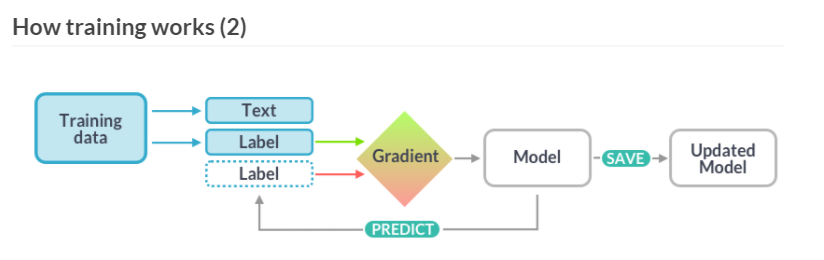

In [ ]:
fake_news_df = fake_news_df.sample(10000, random_state=786).reset_index(drop=True)

In [ ]:
colors = ['gold', 'mediumturquoise']
labels = ['REAL','FAKE']
values = fake_news_df['class'].value_counts()/fake_news_df['class'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Target Balance",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

In [ ]:
from pycaret.nlp import *
%time 
fake_news_nlp = setup(data = fake_news_df, target = 'text', session_id = 123)

In [ ]:
%time 
lda = create_model('lda',multi_core=True)
%time 
lda_df = assign_model(lda)
plot_model(lda, plot = 'topic_distribution')
plot_model(lda, plot = 'wordcloud')
plot_model(lda, plot = 'umap')
plot_model(lda, plot = 'tsne')
plot_model(lda, plot = 'topic_model')
plot_model(lda, plot = 'pos')
plot_model(lda, plot = 'bigram')

In [ ]:
from pycaret.classification import *
%time 
setup(data = lda_df, 
      target = 'class',
      silent = True)

In [ ]:
%time 
compare_models(sort='Accuracy',n_select = 5)